In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [53]:
titanic_df = pd.read_csv ('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
size_map = {'male':1, 'female':2}
titanic_df['Sex'] = titanic_df['Sex'].map(size_map)
class_labels = LabelEncoder()
titanic_df['Cabin'] = class_labels.fit_transform(titanic_df['Cabin'].values)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,81,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,147,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,55,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,147,S
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,30,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,147,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,60,C


In [55]:
titanic_dummy = pd.get_dummies(titanic_df[['Embarked']])
titanic_dummy

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [56]:
titanic_df = pd.concat([titanic_df, titanic_dummy], axis=1)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,81,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,147,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,55,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,147,S,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,30,S,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,147,S,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,60,C,True,False,False


In [57]:
titanic_df = titanic_df.drop(['Embarked', 'Ticket','Name'], axis = 1)
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,147,False,False,True
1,2,1,1,2,38.0,1,0,71.2833,81,True,False,False
2,3,1,3,2,26.0,0,0,7.9250,147,False,False,True
3,4,1,1,2,35.0,1,0,53.1000,55,False,False,True
4,5,0,3,1,35.0,0,0,8.0500,147,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,147,False,False,True
887,888,1,1,2,19.0,0,0,30.0000,30,False,False,True
888,889,0,3,2,NaN,1,2,23.4500,147,False,False,True
889,890,1,1,1,26.0,0,0,30.0000,60,True,False,False


<Axes: >

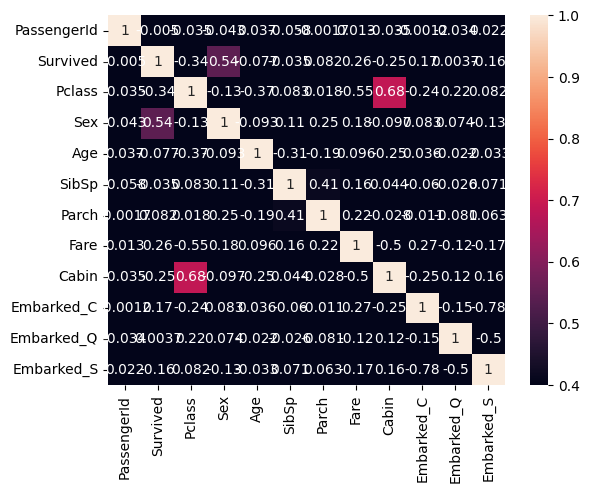

In [58]:
titanic_corr=titanic_df.corr()
sns.heatmap(titanic_df.corr(),annot=True,vmin=.4, vmax=1)

<Axes: >

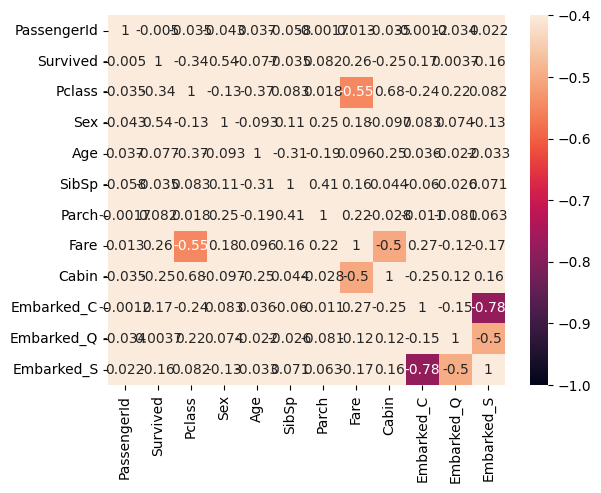

In [59]:
sns.heatmap(titanic_df.corr(),annot=True,vmin=-1, vmax=-.4)

I chose this data as this was the most corrleated on the heat map within .4 of the correlation. I used survived as the y as that is what we are trying to predict and those variables for x as that influces the value of y in the predction.

In [60]:
y = titanic_df ['Survived'] 
X = titanic_df [['Sex', 'Fare', 'Embarked_C', 'Embarked_S', 'Pclass', 'Cabin', 'Embarked_Q']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = regression_model.predict(X_test)
y_pred

array([0.20318522, 0.21604047, 0.07891133, 0.7184689 , 0.70025923,
       0.86434054, 0.65162968, 0.08094671, 0.65162968, 0.84960217,
       0.35178246, 0.07893659, 0.58033808, 0.20156484, 0.21654552,
       0.85142829, 0.35579093, 0.65164568, 0.21654552, 0.35125133,
       0.07890543, 0.35589185, 0.57677996, 0.07917396, 0.08023963,
       0.08294673, 0.4789233 , 0.21654552, 0.08294673, 0.57677996,
       0.07890543, 0.57675891, 0.47952431, 0.5767185 , 0.07893659,
       0.20302529, 0.3439022 , 0.65162968, 0.9774687 , 0.07890543,
       0.22876787, 0.07873372, 0.07893659, 0.15374675, 0.70090822,
       0.08425482, 0.07895847, 0.07917396, 0.07873456, 0.49219139,
       0.70187876, 0.85597366, 0.08294673, 0.36447401, 0.15374675,
       0.86326654, 0.21604047, 1.00978124, 0.71604463, 0.65165578,
       0.07888103, 0.7157416 , 0.71705474, 0.35576559, 0.15374675,
       0.71279075, 0.22876787, 0.07890123, 0.20156568, 0.98176624,
       0.71705474, 1.01267915, 0.47042551, 0.98625537, 0.07889

In [62]:
accuracy_score = regression_model.score(X_test, y_test)
print(accuracy_score)

0.40428772696269033


In [63]:
regression_model.coef_

array([ 4.97882929e-01,  2.02022262e-04, -2.56062127e-02, -1.48401130e-01,
       -1.36608926e-01,  1.02968256e-04, -7.35303618e-02])

In [64]:
# x1 = 4.9^-1*x2 + 2.02^-4*x3 + -2.56^-2*x4 + -1.48^-1*x5 + -137^-1*x6 + 1.02^-4*x7 + -7.35^-2*x8

I chose this data as this was placed in the heatmap with the most corrolation for the data and when put together gave the best accuracy score after checking, even though it is only .4